In [1]:
import matplotlib.pyplot as plt
import phantom_generator as pg
import pandas as pd

import statistics_calc as sc
import numpy as np

Все фантому будут генерироваться своим алгоритмом гененрации фантомомв:

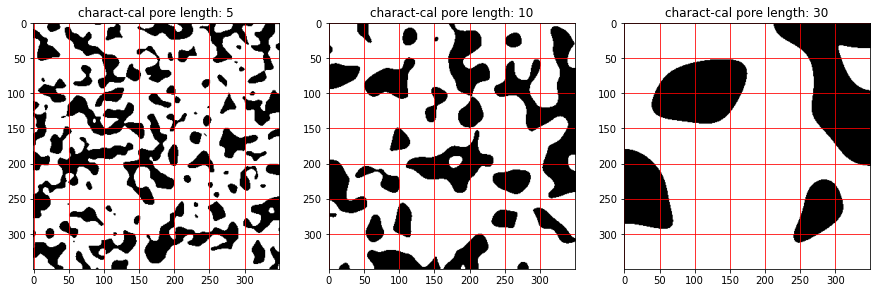

In [2]:
characteristical_lengths = [5, 10, 30]
porosity = 0.3
shape = [350, 350]

phantoms = [pg.gen_phantom(shape, porosity, cl) for cl in characteristical_lengths]

fig, axes = plt.subplots(ncols=3, figsize=(15,5))

for ax, cl, phantom in zip(axes, characteristical_lengths, phantoms):
    ax.imshow(phantom, cmap='gray')
    ax.set_title(f"charact-cal pore length: {cl}")
    ax.grid(color='red')

Будем генерировать фантомы разных пористостей и характеристической длины пор, и измерять у них следующие характеристики:

- Среднюю величину распределения длин ПОР (MEAN_pore_row_length)
- Медиану распределения длин ПОР (median_pore_row_length)
- Среднюю величину распределения длин МАТЕРИАЛА (MEAN_material_row_length)
- Медиану распределения длин МАТЕРИАЛА (median_material_row_length)
- Сумма медиан (sum_medians)
- сумма средних (sum_MEANS)

#TODO: - Диаметры объемов распределения пор

Пористости для генерирования 0.1, 0.15, 0.2, ..., 0.5

Характеристические длины 5, 10, 15, 20, 25, 30

Каждый фантом генерируется sample_count=10 раз (sample_id задается колонкой attempt для каждой попытки)

In [3]:
sample_count = 10
characteristical_pore_lengths = [5, 10, 15, 20, 25, 30]
porosities = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

train_dataframe = pd.DataFrame(columns = ['porosity', 
                                          'characteristical_pore_length',
                                          'sample_id',
                                          'MEAN_pore_row_length',
                                          'median_pore_row_length',
                                          'MEAN_material_row_length',
                                          'median_material_row_length',
                                          'sum_medians',
                                          'sum_MEANS'])


for sample_id in range(sample_count):
    print(f"{sample_id+1} out of {sample_count}")
    for porosity in porosities:
        for characteristical_pore_length in characteristical_pore_lengths:
            phantom = pg.gen_phantom(shape, porosity, characteristical_pore_length)
            stat_zeros, stat_ones = sc.get_row_statistics(phantom, row_numbers="all", axis="both")

            MEAN_pore_row_length = np.mean(stat_zeros)
            MEAN_material_row_length = np.mean(stat_ones)

            median_pore_row_length = np.median(stat_zeros)
            median_material_row_length = np.median(stat_ones)

            train_dataframe = train_dataframe.append({'porosity': porosity,
                                                      'characteristical_pore_length': characteristical_pore_length,
                                                      'sample_id': sample_id,
                                                      'MEAN_pore_row_length': MEAN_pore_row_length,
                                                      'median_pore_row_length': median_pore_row_length,
                                                      'MEAN_material_row_length': MEAN_material_row_length,
                                                      'median_material_row_length': median_material_row_length,
                                                      'sum_medians': median_pore_row_length + median_material_row_length,
                                                      'sum_MEANS': MEAN_pore_row_length + MEAN_material_row_length},
                                                      ignore_index=True)

1 out of 10
2 out of 10
3 out of 10
4 out of 10
5 out of 10
6 out of 10
7 out of 10
8 out of 10
9 out of 10
10 out of 10


In [4]:
train_dataframe

,porosity,characteristical_pore_length,sample_id,MEAN_pore_row_length,median_pore_row_length,MEAN_material_row_length,median_material_row_length,sum_medians,sum_MEANS
0,0.1,5.0,0.0,10.815606,9.0,75.624487,56.0,65.0,86.440093
1,0.1,10.0,0.0,18.973958,16.0,120.164294,81.0,97.0,139.138252
2,0.1,15.0,0.0,34.313472,30.0,159.836138,126.0,156.0,194.149609
3,0.1,20.0,0.0,33.176781,33.0,177.563813,162.5,195.5,210.740594
4,0.1,25.0,0.0,39.385542,30.0,214.585507,186.0,216.0,253.971049
...,...,...,...,...,...,...,...,...,...
535,0.5,10.0,9.0,43.493773,36.0,38.525475,32.0,68.0,82.019248
536,0.5,15.0,9.0,63.204651,48.0,64.158996,49.0,97.0,127.363647
537,0.5,20.0,9.0,72.429934,56.0,68.538291,61.0,117.0,140.968225
538,0.5,25.0,9.0,86.720492,82.0,95.524027,78.0,160.0,182.244520


In [5]:
import data_manager as dm

In [6]:
dm.save_data(train_dataframe, 'train_dataframe.csv')
dm.save_data(train_dataframe, 'train_dataframe.xlsx')